In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from scipy.stats import kstest
from sklearn.neighbors import NearestNeighbors

In [2]:
#read full dataframe

df =  pd.read_csv('../../Data/dataframe_with_outliers_3std_4.16%.csv', sep=",", header=None, usecols=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege
1,7.0,A,1.0,1.0,3.0,2.0,1.0,8.0,2.0,2.0,2.0,8.0,2.0,8.0,1.0,6.0,2.0
2,78.0,A,3.0,7.0,5.0,5.0,3.0,12.0,2.0,3.0,2.0,10.0,2.0,9.0,2.0,6.0,3.0
3,118.0,A,3.0,8.0,5.0,6.0,3.0,9.0,2.0,2.0,3.0,8.0,2.0,8.0,2.0,6.0,3.0
4,130.0,A,2.0,1.0,4.0,2.0,1.0,8.0,1.0,2.0,2.0,7.0,2.0,8.0,2.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19707.0,Z,4.0,6.0,6.0,4.0,4.0,9.0,11.0,6.0,5.0,6.0,5.0,9.0,3.0,8.0,9.0
19997,19798.0,Z,2.0,1.0,2.0,1.0,1.0,8.0,7.0,5.0,9.0,6.0,6.0,8.0,1.0,8.0,6.0
19998,19808.0,Z,3.0,9.0,4.0,7.0,2.0,7.0,7.0,4.0,14.0,10.0,6.0,8.0,0.0,8.0,8.0
19999,19884.0,Z,5.0,10.0,6.0,8.0,3.0,7.0,7.0,4.0,15.0,9.0,6.0,8.0,0.0,8.0,8.0


In [3]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [17]:
letters = df[1]
df = df.drop(1, axis=1)
df = df.drop(0, axis=1)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,1.0,3.0,2.0,1.0,8.0,2.0,2.0,2.0,8.0,2.0,8.0,1.0,6.0,2.0
1,3.0,7.0,5.0,5.0,3.0,12.0,2.0,3.0,2.0,10.0,2.0,9.0,2.0,6.0,3.0
2,3.0,8.0,5.0,6.0,3.0,9.0,2.0,2.0,3.0,8.0,2.0,8.0,2.0,6.0,3.0
3,2.0,1.0,4.0,2.0,1.0,8.0,1.0,2.0,2.0,7.0,2.0,8.0,2.0,5.0,2.0
4,3.0,7.0,5.0,5.0,3.0,10.0,4.0,1.0,2.0,8.0,3.0,9.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4.0,6.0,6.0,4.0,4.0,9.0,11.0,6.0,5.0,6.0,5.0,9.0,3.0,8.0,9.0
19996,2.0,1.0,2.0,1.0,1.0,8.0,7.0,5.0,9.0,6.0,6.0,8.0,1.0,8.0,6.0
19997,3.0,9.0,4.0,7.0,2.0,7.0,7.0,4.0,14.0,10.0,6.0,8.0,0.0,8.0,8.0
19998,5.0,10.0,6.0,8.0,3.0,7.0,7.0,4.0,15.0,9.0,6.0,8.0,0.0,8.0,8.0


2
<class 'int'>
KstestResult(statistic=0.9077998680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


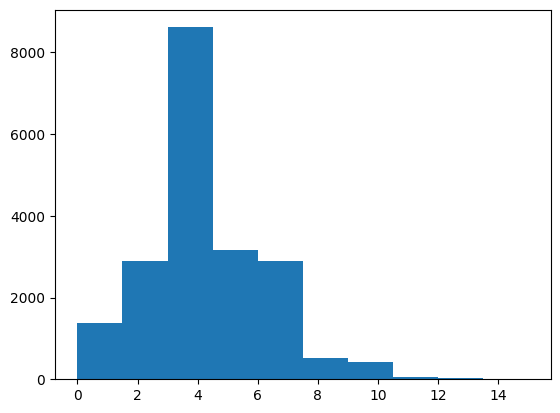

3
<class 'int'>
KstestResult(statistic=0.9029998680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


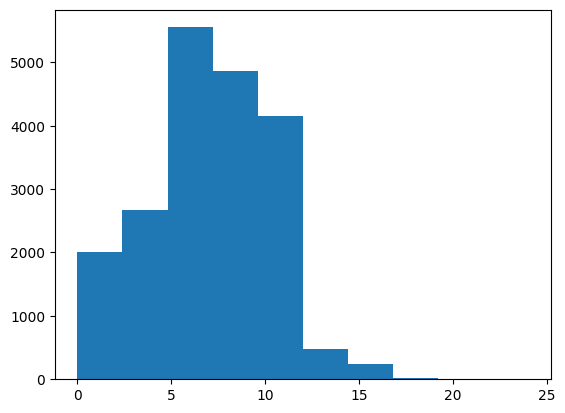

4
<class 'int'>
KstestResult(statistic=0.9482998680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


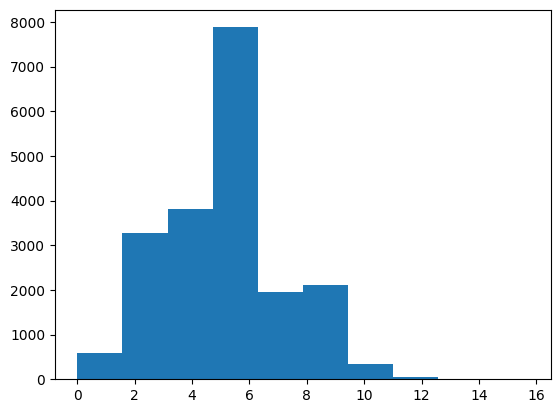

5
<class 'int'>
KstestResult(statistic=0.9151998680518207, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


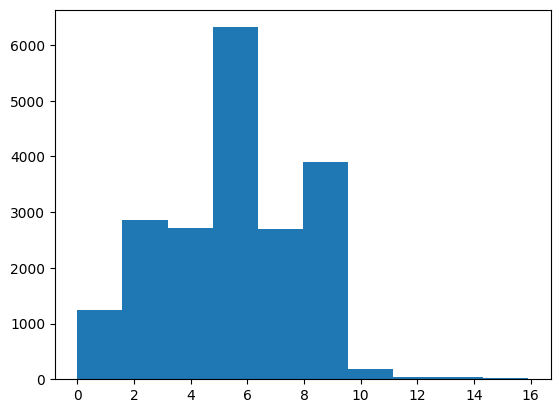

6
<class 'int'>
KstestResult(statistic=0.8143998680518207, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


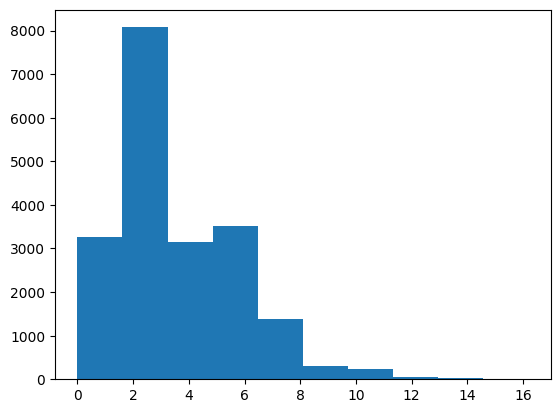

7
<class 'int'>
KstestResult(statistic=0.9740501019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


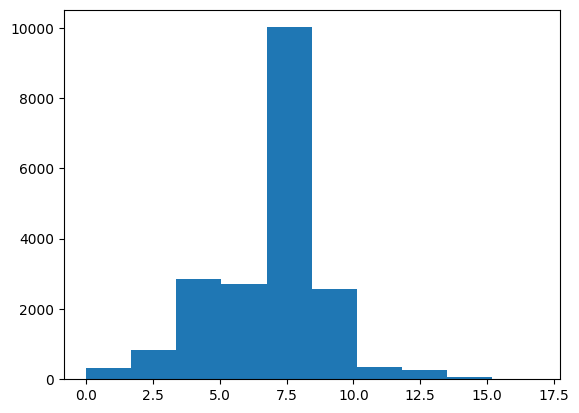

8
<class 'int'>
KstestResult(statistic=0.9700501019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


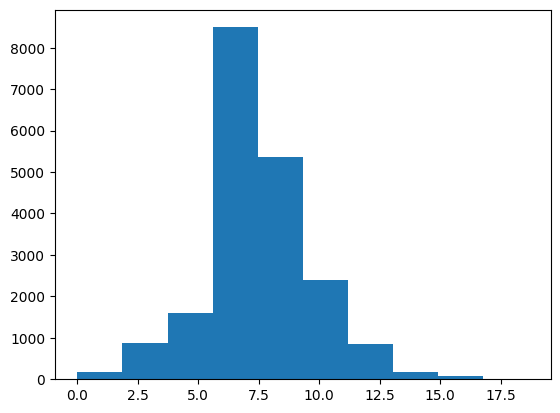

9
<class 'int'>
KstestResult(statistic=0.9020998680518209, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


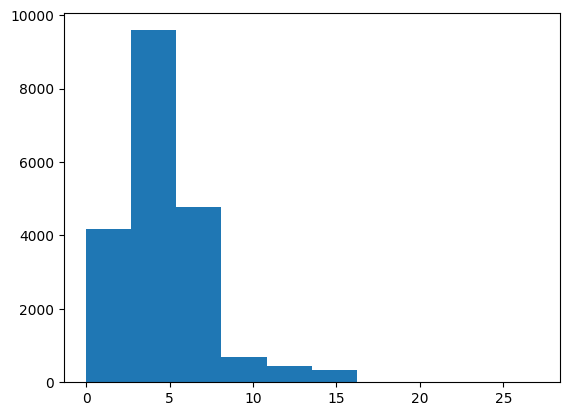

10
<class 'int'>
KstestResult(statistic=0.9229498680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


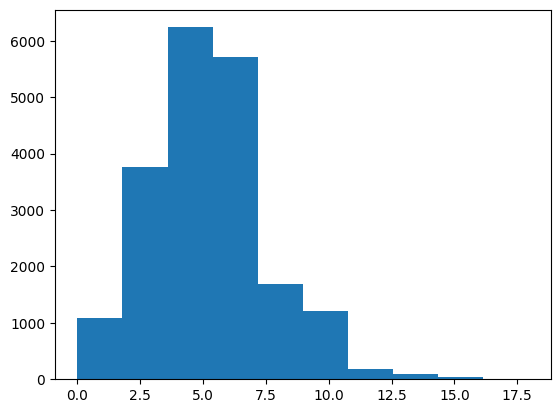

11
<class 'int'>
KstestResult(statistic=0.9835001019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


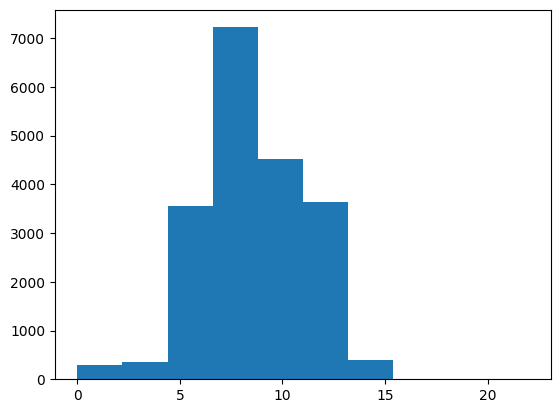

12
<class 'int'>
KstestResult(statistic=0.9464498680518207, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


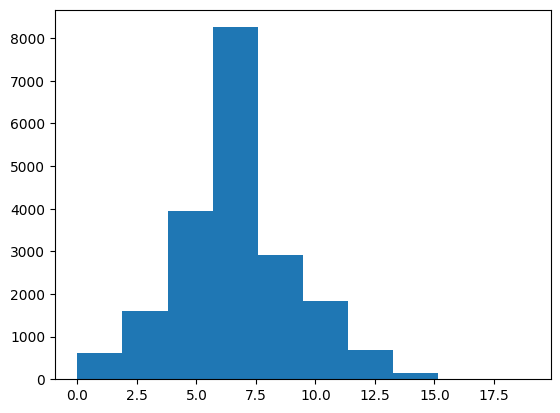

13
<class 'int'>
KstestResult(statistic=0.9948001019683699, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


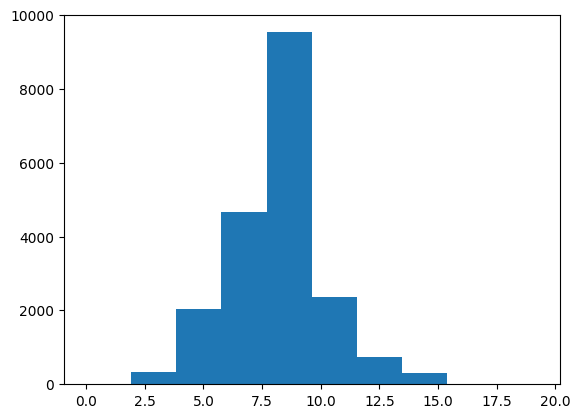

14
<class 'int'>
KstestResult(statistic=0.7264998680518209, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


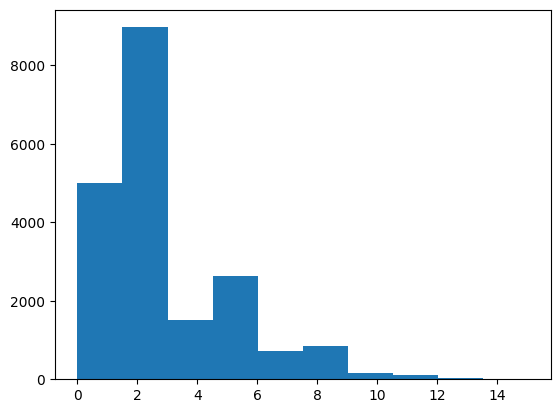

15
<class 'int'>
KstestResult(statistic=0.9971001019683698, pvalue=0.0, statistic_location=3.0, statistic_sign=-1)


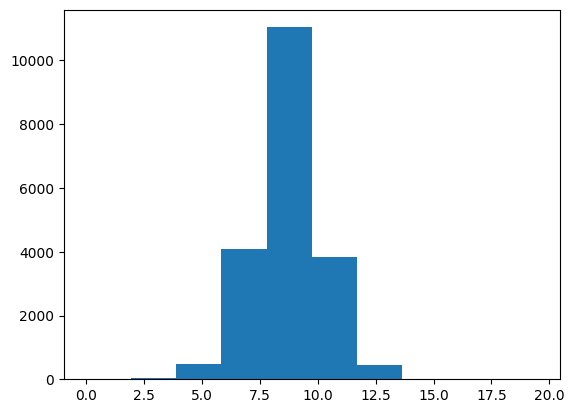

16
<class 'int'>
KstestResult(statistic=0.7521498680518208, pvalue=0.0, statistic_location=2.0, statistic_sign=-1)


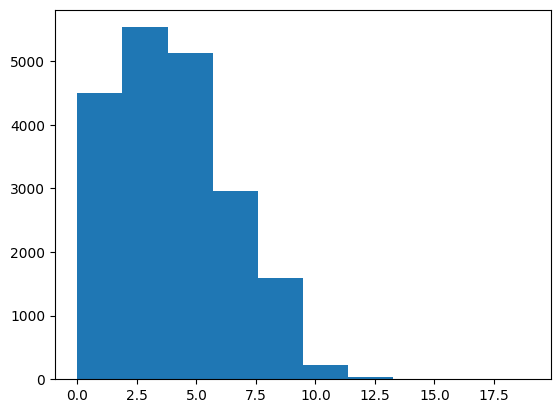

In [18]:
#Test for gaussian distribution with the kolmogorov-smirnov test, as well as visually through histograms
for i in range(2,17):
    print(i)
    print(type(i))
    print(kstest(df[i], 'norm'))
    plt.hist(df[i])
    plt.show()
    
# Results show that the distribution of the data is not normal (p-value, histograms), thus, we cannot use PCA or other methods that assume normal distribution

In [19]:
#KNN (K-Nearest Neighbors) to determine the eps-value for the DBSCAN

neighbors = NearestNeighbors(n_neighbors=32)
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

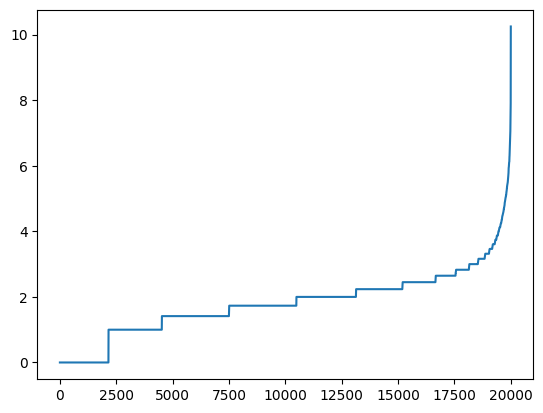

In [20]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [21]:
#DBSCAN
#min_samples = 2*Dimensions(=16) = 32
#eps = 3.9 (knee, after some testing, 3.9 produces the best results)
db = DBSCAN(eps=3.9, min_samples=32).fit(df)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

#Make copy of DF and then add new columns to it so we can rerun this code as much as we like
df1 = df.copy()
df1['cluster'] = labels
df1[0] = letters
print(n_clusters_, n_noise_)
df1

percent_outliers = n_noise_ / len(df1.index) * 100
print("Outliers: ", percent_outliers, "%")
#Cluster -1 contains the outliers.
#14 clusters, 3852 ouliers (19.26%)

13 3204
Outliers:  16.02 %


In [22]:
#Show clusters and letter combinations.
df2 = df1
pd.set_option('display.max_rows', 200)
df2.groupby(['cluster', 0]).size()

#Displays each cluster and how many units of each letter are included in the cluster. 
#As can be seen, cluster 0 is very big, while other clusters are very small. 

cluster  0
-1       A    134
         B     48
         C    114
         D     77
         E     65
         F    112
         G     84
         H    103
         I     91
         J    135
         K    154
         L    144
         M    259
         N    156
         O     79
         P    210
         Q    135
         R     57
         S    140
         T     75
         U    115
         V    129
         W    179
         X     90
         Y    185
         Z    134
 0       A    580
         L      2
         M      1
         O      1
         Q      1
         S      5
 1       A     75
         B    718
         C    622
         D    728
         E    703
         F    663
         G    689
         H    444
         I    663
         J    453
         K    585
         L    105
         M    337
         N    420
         O    673
         P    593
         Q    647
         R    701
         S    603
         T    683
         U    502
         V    635
         W    532

A


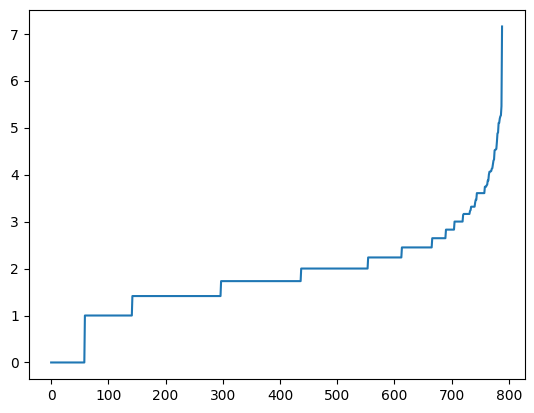

knee:  784 5.0990195135927845
Letter: A Number of clusters:  2 Number of outliers: 13 Percentage of outliers: 1.65 %
B


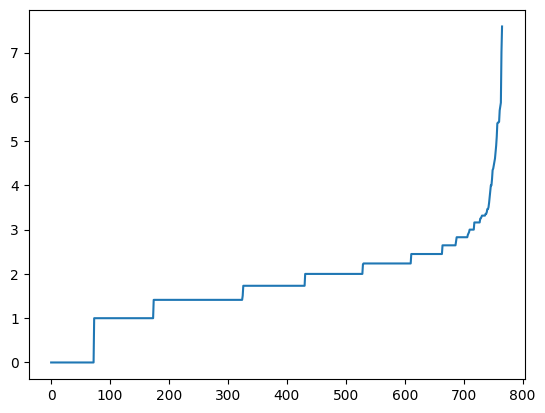

knee:  737 3.3166247903554
Letter: B Number of clusters:  1 Number of outliers: 195 Percentage of outliers: 25.46 %
C


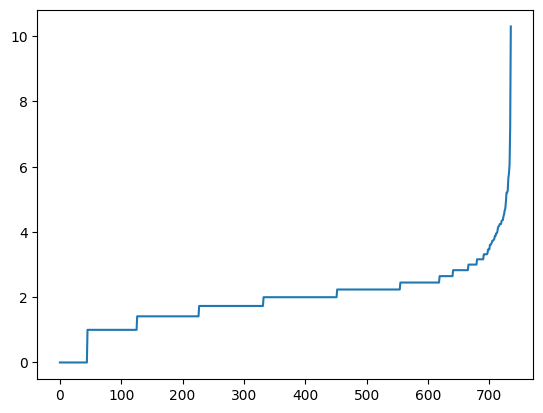

knee:  720 4.242640687119285
Letter: C Number of clusters:  4 Number of outliers: 52 Percentage of outliers: 7.07 %
D


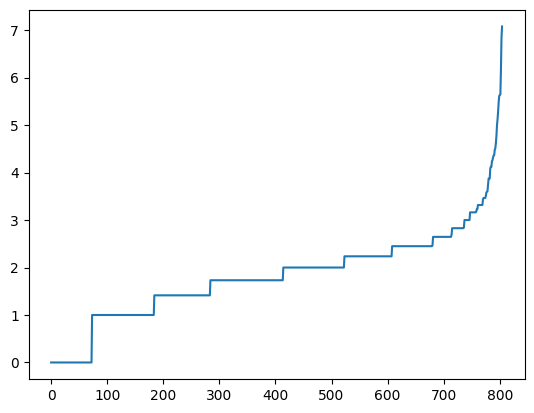

knee:  783 3.8748682669388823
Letter: D Number of clusters:  3 Number of outliers: 105 Percentage of outliers: 13.04 %
E


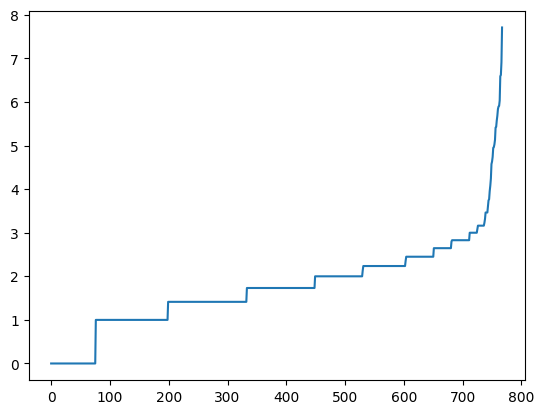

knee:  743 3.4641016151377544
Letter: E Number of clusters:  5 Number of outliers: 199 Percentage of outliers: 25.91 %
F


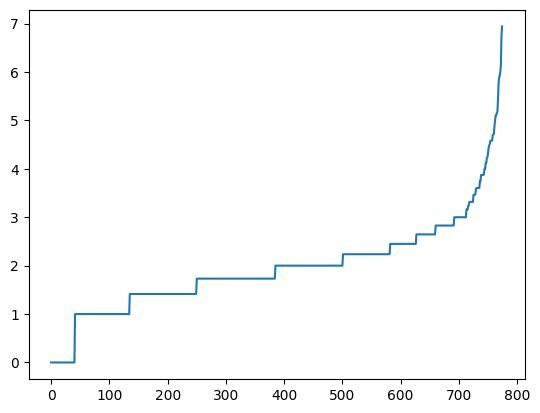

knee:  758 4.58257569495584
Letter: F Number of clusters:  2 Number of outliers: 37 Percentage of outliers: 4.77 %
G


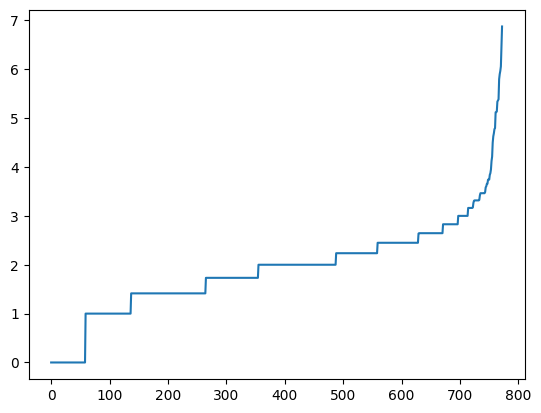

knee:  751 3.7416573867739413
Letter: G Number of clusters:  3 Number of outliers: 150 Percentage of outliers: 19.40 %
H


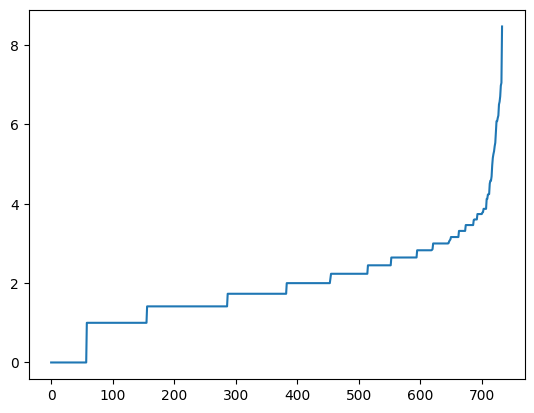

knee:  713 4.242640687119285
Letter: H Number of clusters:  5 Number of outliers: 110 Percentage of outliers: 14.99 %
I


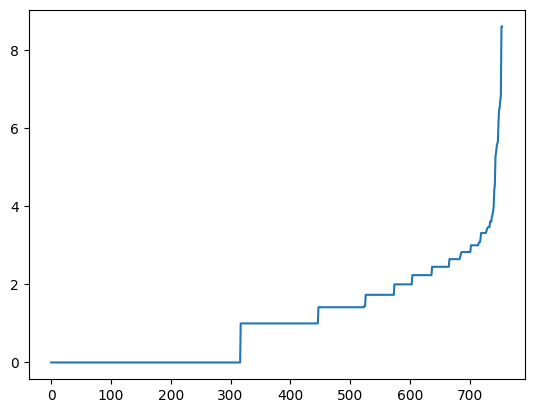

knee:  737 3.605551275463989
Letter: I Number of clusters:  5 Number of outliers: 181 Percentage of outliers: 23.97 %
J


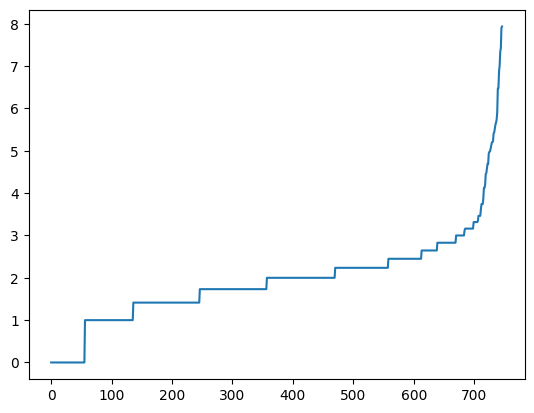

knee:  715 3.7416573867739413
Letter: J Number of clusters:  5 Number of outliers: 163 Percentage of outliers: 21.82 %
K


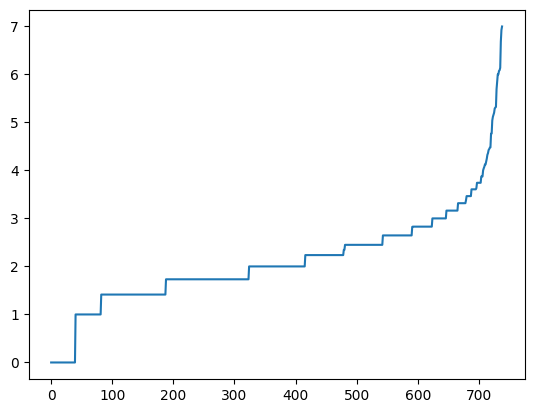

knee:  707 3.872983346207417
Letter: K Number of clusters:  4 Number of outliers: 194 Percentage of outliers: 26.25 %
L


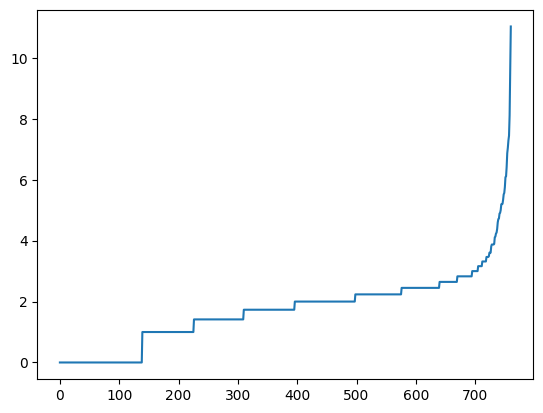

knee:  747 5.206600293880279
Letter: L Number of clusters:  3 Number of outliers: 19 Percentage of outliers: 2.50 %
M


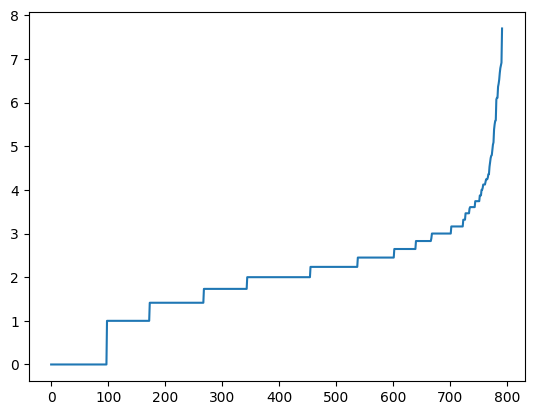

knee:  766 4.242640687119285
Letter: M Number of clusters:  3 Number of outliers: 184 Percentage of outliers: 23.23 %
N


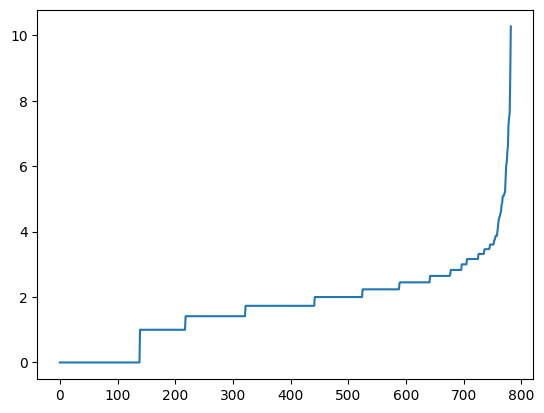

knee:  759 3.872983346207417
Letter: N Number of clusters:  2 Number of outliers: 197 Percentage of outliers: 25.16 %
O


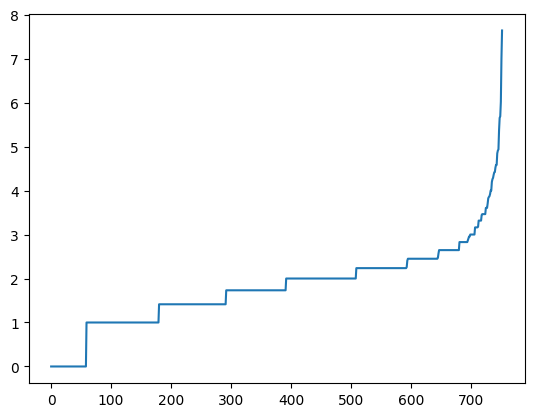

knee:  728 3.605551275463989
Letter: O Number of clusters:  1 Number of outliers: 191 Percentage of outliers: 25.37 %
P


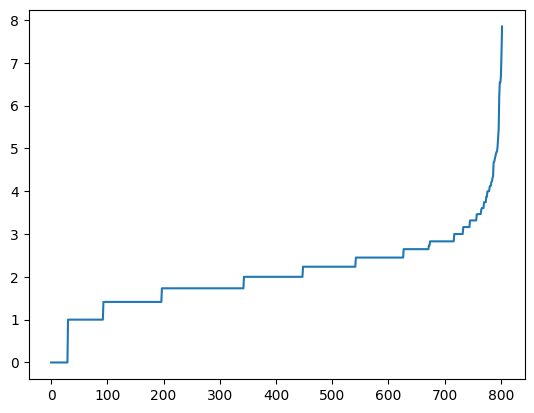

knee:  780 4.0
Letter: P Number of clusters:  3 Number of outliers: 115 Percentage of outliers: 14.32 %
Q


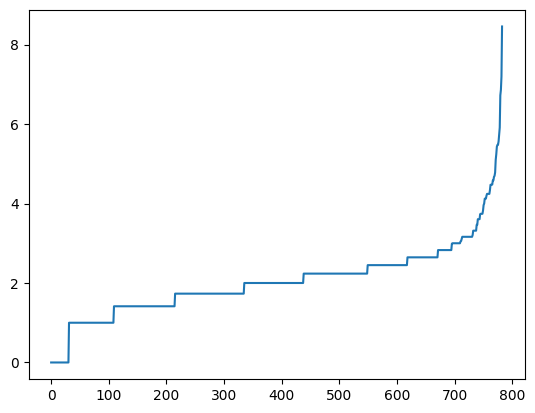

knee:  766 4.477597935981031
Letter: Q Number of clusters:  3 Number of outliers: 63 Percentage of outliers: 8.05 %
R


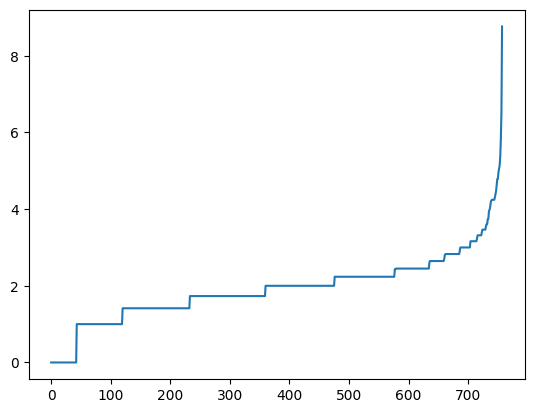

knee:  745 4.24538122654286
Letter: R Number of clusters:  1 Number of outliers: 36 Percentage of outliers: 4.75 %
S


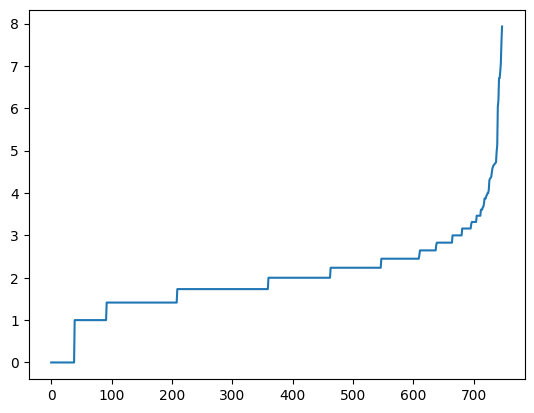

knee:  721 3.872983346207417
Letter: S Number of clusters:  5 Number of outliers: 139 Percentage of outliers: 18.58 %
T


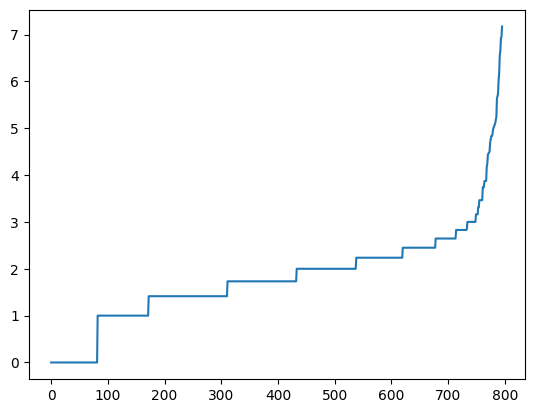

knee:  768 3.872983346207417
Letter: T Number of clusters:  6 Number of outliers: 74 Percentage of outliers: 9.30 %
U


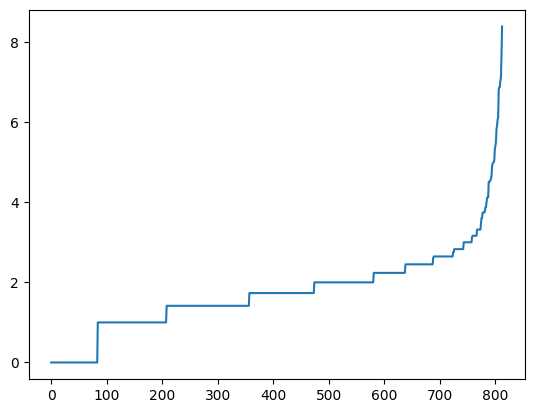

knee:  791 4.5217108345209756
Letter: U Number of clusters:  2 Number of outliers: 32 Percentage of outliers: 3.94 %
V


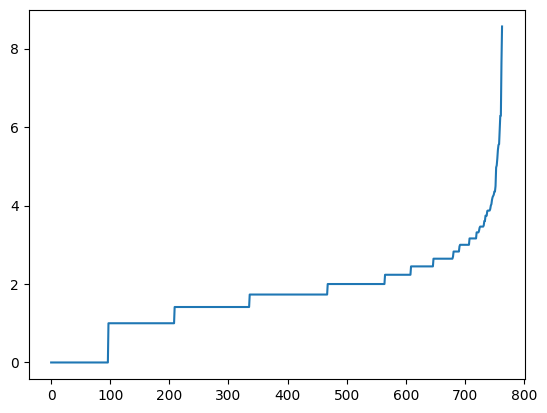

knee:  743 3.872983346207417
Letter: V Number of clusters:  3 Number of outliers: 114 Percentage of outliers: 14.92 %
W


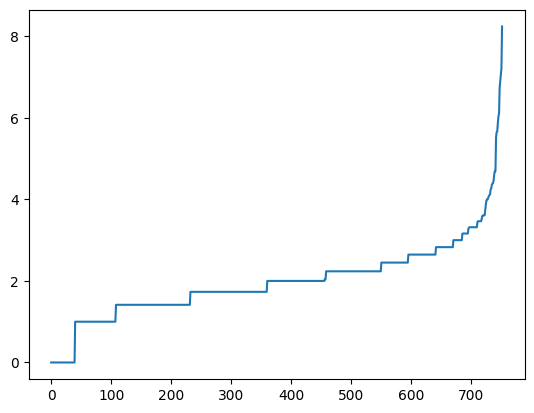

knee:  723 3.6101974193291144
Letter: W Number of clusters:  3 Number of outliers: 203 Percentage of outliers: 26.99 %
X


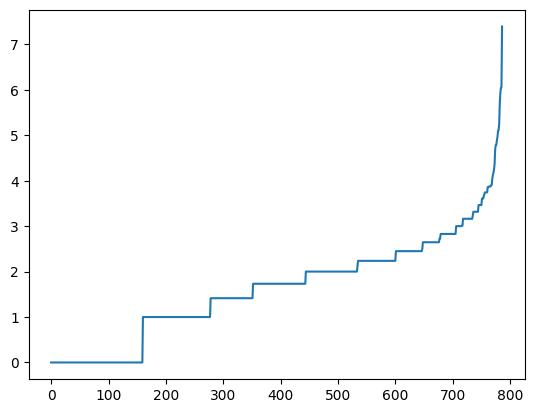

knee:  767 3.872983346207417
Letter: X Number of clusters:  2 Number of outliers: 99 Percentage of outliers: 12.58 %
Y


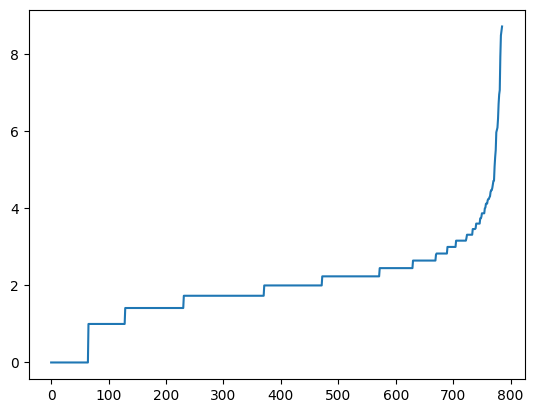

knee:  760 4.123105625617661
Letter: Y Number of clusters:  4 Number of outliers: 152 Percentage of outliers: 19.34 %
Z


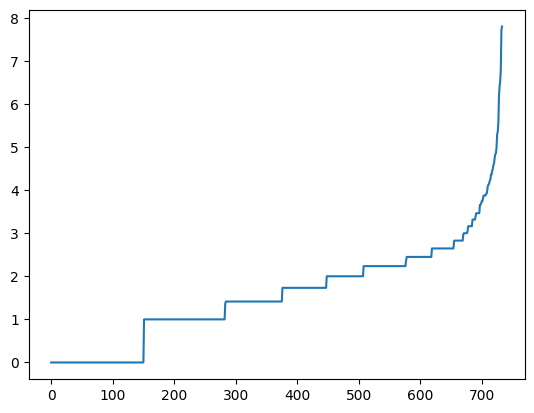

knee:  707 3.872983346207417
Letter: Z Number of clusters:  3 Number of outliers: 117 Percentage of outliers: 15.94 %

Overall outliers:  15.67 %


In [27]:
#KNN (K-Nearest Neighbors) to determine the eps-value for the DBSCAN for each letter
#for ltr in range(65,91): loop through alphabet; 65=A, 66=B, ... 89=Y, 90=Z
num_outliers = 0
ltr_data = pd.DataFrame({
    #'letter': [],
    'clusters': [],
    'outliers': [],
    'percent_outliers': [],
})

for ltr in range(65,91):
    ltr = chr(ltr)
    print(ltr)
    
    dfFiltered = df1[df1[0] == ltr]
    lettersFiltered = dfFiltered[0]
    dfFiltered = dfFiltered.drop(0, axis=1)
    dfFiltered = dfFiltered.drop('cluster', axis=1)

    neighbors = NearestNeighbors(n_neighbors=17)
    neighbors_fit = neighbors.fit(dfFiltered)
    distances, indices = neighbors_fit.kneighbors(dfFiltered)
    
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.show()
    
    #calculates the knee (eps)
    from kneed import KneeLocator
    y = distances
    x = range(1, len(distances)+1)
    kn = KneeLocator(x, y, curve='convex', direction='increasing')
    print('knee: ', kn.knee, y[x.index(kn.knee)])
    
    #runs the DBSCAN for each letter with eps = knee and min_samples = 17 (D+1, which is the recommended minimum)
    dbFiltered = DBSCAN(eps=y[x.index(kn.knee)], min_samples=17).fit(dfFiltered)

    core_samples_mask = np.zeros_like(dbFiltered.labels_, dtype=bool)
    core_samples_mask[dbFiltered.core_sample_indices_] = True
    labelsFiltered = dbFiltered.labels_

    #Number of clusters in labels, ignoring noise if present.
    n_clusters_Filtered = len(set(labelsFiltered)) - (1 if -1 in labelsFiltered else 0)
    n_noise_Filtered = list(labelsFiltered).count(-1)
    
    num_outliers += n_noise_Filtered

    #Make copy of DF and then add new columns to the copy so we can rerun this code as much as we like
    df1Filtered = dfFiltered.copy()
    df1Filtered['cluster'] = labelsFiltered
    df1Filtered[0] = lettersFiltered
    
    ltr_percent_outliers = n_noise_Filtered / len(dfFiltered) * 100
    
    print('Letter:', ltr, 'Number of clusters: ', n_clusters_Filtered, 'Number of outliers:', n_noise_Filtered, 'Percentage of outliers:', '{:.2f}'.format(ltr_percent_outliers), '%')
    ltr_data.loc[ltr]=[n_clusters_Filtered, n_noise_Filtered, ltr_percent_outliers]

percent_outliers = num_outliers / len(df1.index) * 100
ltr_data.loc["sum", "percent_outliers"] = percent_outliers
print("")
print("Overall outliers: ", percent_outliers, "%")

#Returns with the knee value and graph, as well as the number of clusters and the number of outliers for each letter
#Final percentage of outliers for all letters together is 14.59%

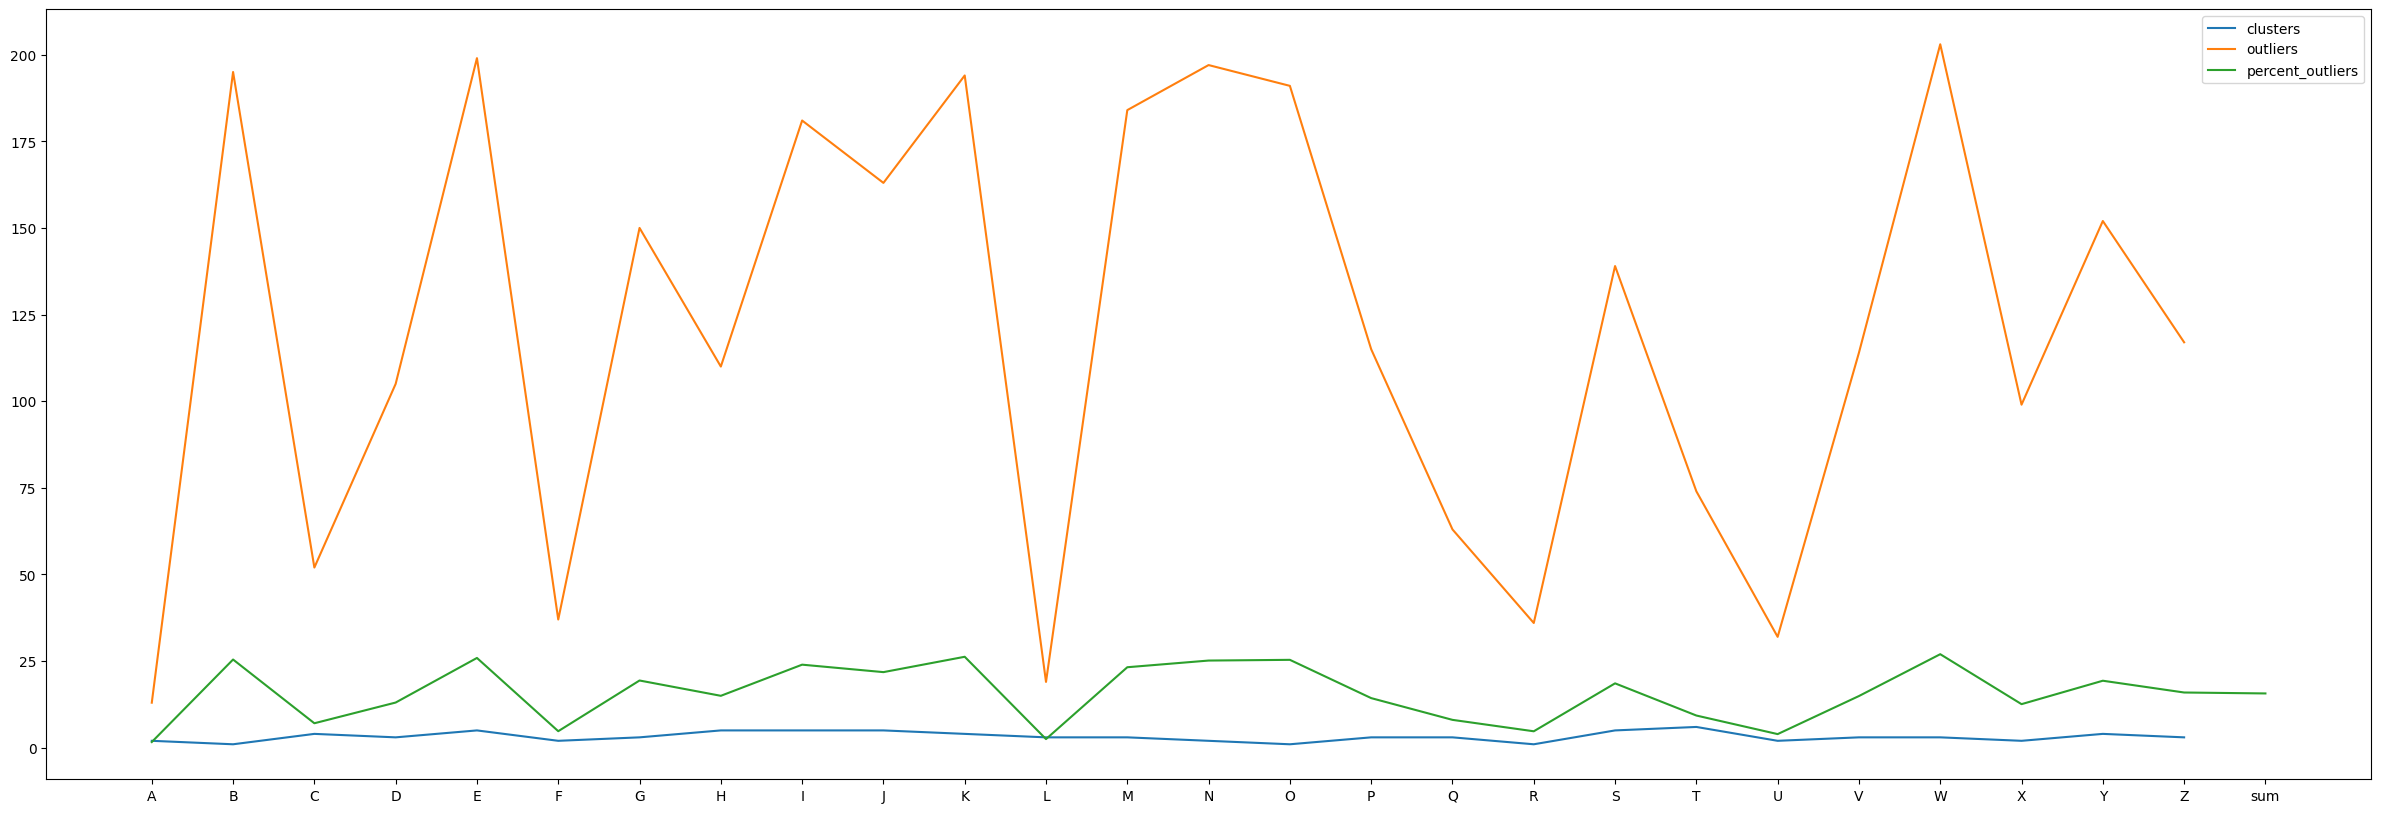

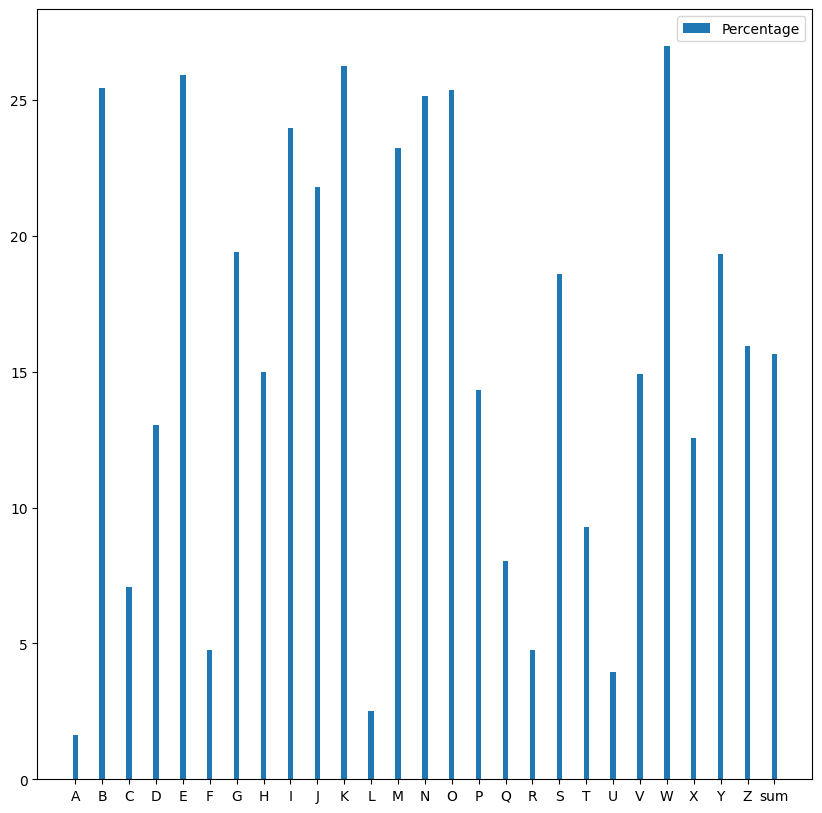

In [29]:

ltr_data.plot(figsize=(30,10))
plt.xticks(range(0,27), labels=ltr_data.index)
plt.show()

fig = plt.figure(figsize=(10,10))
#plt.bar(np.arange(len(ltr_data))-0.2, height=ltr_data['clusters'], width=0.2, label='Clusters')
#plt.bar(np.arange(len(ltr_data))+0.2, height=ltr_data['outliers'], width=0.2, label='Outliers')
plt.bar(np.arange(len(ltr_data)), height=ltr_data['percent_outliers'], width=0.2, label='Percentage')
plt.xticks(range(0,27), labels=ltr_data.index)
plt.legend()
plt.show(fig)


In [31]:
ltr_data.to_csv("result_DBScan.csv")